In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.svm import LinearSVC, SVC
import os #to get a list of the folder's file

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Real values


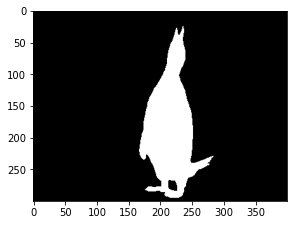

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


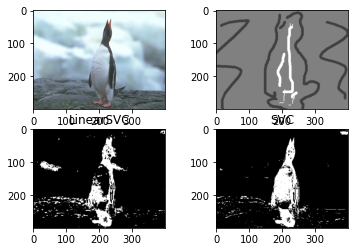

--> Linear SVC Accuracy
95.78 %
--> SVC Accuracy
91.29 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


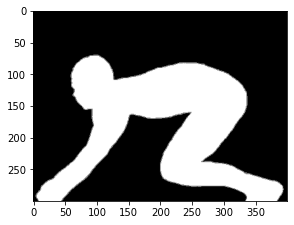

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


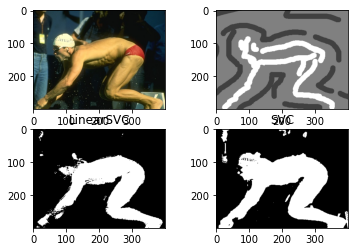

--> Linear SVC Accuracy
92.56 %
--> SVC Accuracy
89.94 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


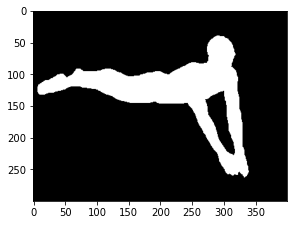

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


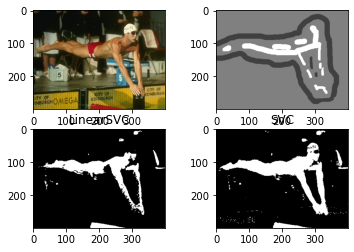

--> Linear SVC Accuracy
95.19 %
--> SVC Accuracy
91.7 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


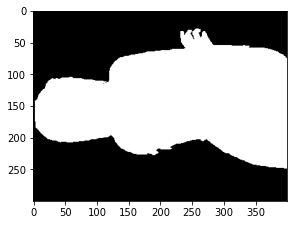

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


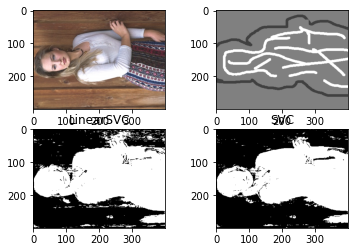

--> Linear SVC Accuracy
94.11 %
--> SVC Accuracy
91.72 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


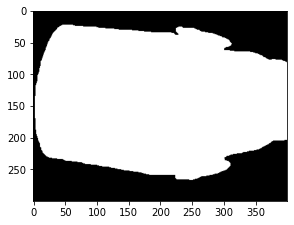

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


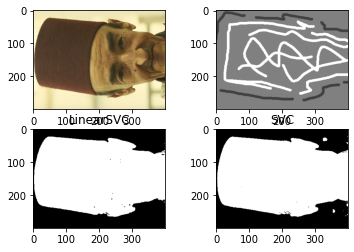

--> Linear SVC Accuracy
98.76 %
--> SVC Accuracy
99.05 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


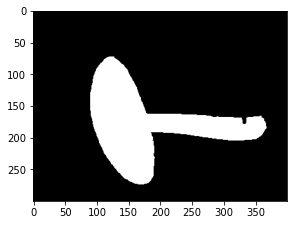

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC & SVC


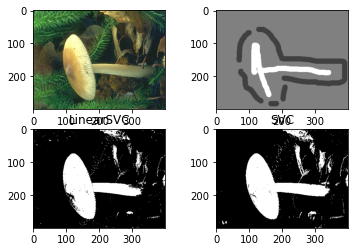

--> Linear SVC Accuracy
94.39 %
--> SVC Accuracy
94.82 %
Real values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


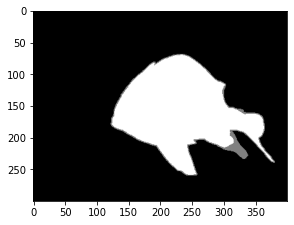

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
imageslist = os.listdir('../datasets/imagenes_segmentacion/images/')
SVC_globalAcc = 0
Linear_globalAcc = 0
for filename in imageslist: 
    img = cv2.imread('../datasets/imagenes_segmentacion/images/'+filename)
    mark = cv2.imread('../datasets/imagenes_segmentacion/bordes_mr/'+filename)
    real = cv2.imread('../datasets/imagenes_segmentacion/bordes_real/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    totalPix = img.shape[0]*img.shape[1] #número total de pixeles [0]=altura [1]=anchura
    #(DESCOMENTAR PARA VER original, bordes aprox y bordes reales )
#     plt.figure()
#     plt.subplot(1,3,1)
#     plt.imshow(img)
#     plt.subplot(1,3,2)
#     plt.imshow(mark)
#     plt.subplot(1,3,3)
#     plt.imshow(real)
#     plt.show()
    #image vectorization
    nrows,ncols,nch = img.shape
    Ximg = np.reshape(img,(nrows*ncols,nch))
    Xmask = np.reshape(mark,(nrows*ncols,nch))[:,0]
    Xreal = np.reshape(real,(nrows*ncols,nch))[:,0]
    values = np.unique(Xmask)
#     print(values)
    Xobj = Ximg[ Xmask==255, : ]
    Xbck = Ximg[ Xmask==64, :]
    Xtrain = np.concatenate((Xobj,Xbck),axis=0)

    Yobj = np.ones((len(Xobj)))*255
    Ybck = np.zeros((len(Xbck)))
    Ytrain = np.concatenate((Yobj,Ybck),axis=0)

#     print('Xobj',Xobj.shape)
#     print('Xbck',Xbck.shape)
#     print('Xtrain',Xtrain.shape,'Ytrain',Ytrain.shape)
    model = LinearSVC()
    model.fit(Xtrain,Ytrain)
    Xpred = model.predict(Ximg)
    pred = np.reshape(Xpred,(nrows,ncols))
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    print("Real values")
    plt.imshow(real,cmap='gray')
    plt.show()

    modelL = LinearSVC()
    modelL.fit(Xtrain,Ytrain)
    XpredL = modelL.predict(Ximg)
    predL = np.reshape(XpredL,(nrows,ncols))

    model = SVC()
    model.fit(Xtrain,Ytrain)
    Xpred = model.predict(Ximg)
    pred = np.reshape(Xpred,(nrows,ncols))

    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.subplot(2,2,2)
    plt.imshow(mark,cmap='gray')
    plt.subplot(2,2,3)
    plt.title('LinearSVC')
    print("Linear SVC & SVC")
    plt.imshow(predL,cmap='gray')
    plt.subplot(2,2,4)
    plt.title('SVC')
    plt.imshow(pred,cmap='gray')
    plt.show()
    
    nReal = len(Xreal)
     # Linear Accuracy 
    print("--> Linear SVC Accuracy")
    linearTrue = np.count_nonzero(predL)
    linearSVC_accuracy = np.sum(Xreal == Xpred)/nReal #porcentaje de accuracy para SVC
    print(np.round(linearSVC_accuracy*100,2),'%')

    #SVC Accuracy
    print("--> SVC Accuracy")
    svcTrue = np.count_nonzero(pred)
    SVC_accuracy = np.sum(Xreal == XpredL)/nReal #porcentaje de accuracy para SVC
    print(np.round(SVC_accuracy*100,2),'%')

   
    
print("**** SVC Average Accuracy: ", SVC_globalAcc/len(imageslist)," ****")
print("\n**** Linear SVC Average Accuracy: ", SVC_globalAcc/len(imageslist)," ****")